**Krishna Vig 102217119 3Q14**


###Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

###Uploading the Dataset from UCI Library

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
dataset = df
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


###Pre-Processing of Dataset

In [ ]:
dataset.shape

(1599, 12)

In [ ]:
dataset.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
# dataset = dataset.drop(['Date','Time'],axis=1)

<Axes: xlabel='quality', ylabel='count'>

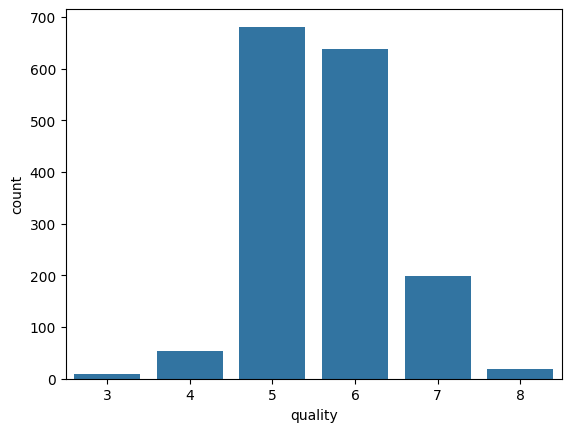

In [ ]:
sns.countplot(x = 'quality', data=dataset)

In [ ]:
X = dataset.iloc[:,0:-1]
y = dataset['quality']

In [ ]:
ss = StandardScaler()
ss.fit_transform(X)

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

###Creation of 10 samples with 70-30 ratio of Training and Testing Set

In [ ]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [ ]:
samples

[(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
  92              8.6             0.490         0.29             2.0      0.110   
  1017            8.0             0.180         0.37             0.9      0.049   
  1447            6.8             0.670         0.00             1.9      0.080   
  838            10.1             0.310         0.35             1.6      0.075   
  40              7.3             0.450         0.36             5.9      0.074   
  ...             ...               ...          ...             ...        ...   
  763             9.3             0.655         0.26             2.0      0.096   
  835             7.6             0.665         0.10             1.5      0.066   
  1216            7.9             0.570         0.31             2.0      0.079   
  559            13.0             0.470         0.49             4.3      0.085   
  684             9.8             0.980         0.32             2.3      0.078   
  
 

### Creation of a Fitness Function

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [ ]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

### Calling the Function for Every Sample

In [ ]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.54 Best Kernel =  rbf Best Nu =  3.85 Best Epsilon =  2.81
Best Accuracy =  0.53 Best Kernel =  rbf Best Nu =  8.65 Best Epsilon =  9.17
Best Accuracy =  0.5 Best Kernel =  rbf Best Nu =  8.59 Best Epsilon =  7.96
Best Accuracy =  0.55 Best Kernel =  rbf Best Nu =  6.58 Best Epsilon =  7.31
Best Accuracy =  0.58 Best Kernel =  rbf Best Nu =  1.47 Best Epsilon =  2.75
Best Accuracy =  0.57 Best Kernel =  rbf Best Nu =  3.36 Best Epsilon =  1.99
Best Accuracy =  0.58 Best Kernel =  rbf Best Nu =  7.94 Best Epsilon =  5.79
Best Accuracy =  0.54 Best Kernel =  rbf Best Nu =  3.39 Best Epsilon =  6.7
Best Accuracy =  0.56 Best Kernel =  rbf Best Nu =  1.84 Best Epsilon =  3.18
Best Accuracy =  0.58 Best Kernel =  rbf Best Nu =  6.74 Best Epsilon =  4.53


###Creation of a Result Table

In [ ]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.54,rbf,3.85,2.81
1,2,0.53,rbf,8.65,9.17
2,3,0.50,rbf,8.59,7.96
3,4,0.55,rbf,6.58,7.31
4,5,0.58,rbf,1.47,2.75
5,6,0.57,rbf,3.36,1.99
6,7,0.58,rbf,7.94,5.79
7,8,0.54,rbf,3.39,6.70
8,9,0.56,rbf,1.84,3.18
9,10,0.58,rbf,6.74,4.53


### Plotting of the Convergence Graph/Linear Curve

In [ ]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()],
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [ ]:
train_sizes

array([  10,   30,   50,   71,   91,  111,  132,  152,  172,  193,  213,
        233,  254,  274,  294,  315,  335,  355,  376,  396,  416,  437,
        457,  478,  498,  518,  539,  559,  579,  600,  620,  640,  661,
        681,  701,  722,  742,  762,  783,  803,  823,  844,  864,  884,
        905,  925,  945,  966,  986, 1007])

In [ ]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

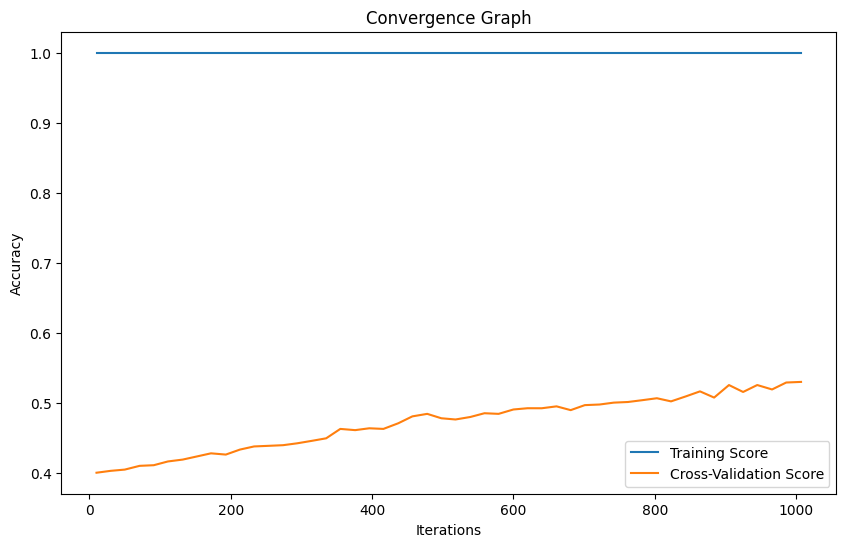

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()